In [1]:
import os
import json
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import grid2op
from grid2op.PlotGrid import PlotMatplot
from pprint import pprint

We will define here the topological actions we want to include in the LIPS benchmark for the l2rpn_neurips_2020_track1_small env.

This is based on the "rl_agent" actions taken in the grid2viz demo (video: https://www.youtube.com/watch?v=xlqS-CzvMwk demo: https://grid2viz-neurips.herokuapp.com/)


## Load ENV

In [2]:
# Defin ENV path
env_path = "l2rpn_neurips_2020_track1_small"

In [3]:
# Load ENV
env = grid2op.make(env_path)

/home/marotant/data_grid2op/l2rpn_neurips_2020_track1_small/config.py:16: UserWarning: The grid2op version you are trying to use is too old for this environment. Please upgrade it.
  warnings.warn("The grid2op version you are trying to use is too old for this environment. Please upgrade it.")


In [4]:
env.backend.get_thermal_limit()

array([ 60.9, 231.9, 272.6, 212.8, 749.2, 332.4, 348. , 414.4, 310.1,
       371.4, 401.2, 124.3, 298.5,  86.4, 213.9, 160.8, 112.2, 291.4,
       489. , 489. , 124.6, 196.7, 191.9, 238.4, 174.2, 105.6, 143.7,
       293.4, 288.9, 107.7, 415.5, 148.2, 124.2, 154.4,  85.9, 106.5,
       142. , 124. , 130.2,  86.2, 278.1, 182. , 592.1, 173.1, 249.8,
       441. , 344.2, 722.8, 494.6, 494.6, 196.7, 151.8, 263.4, 364.1,
       327. , 370.5, 441. , 300.3, 656.2], dtype=float32)

## Line id finder

In [5]:
# To find lines
info_lines = {i:(l[0], l[1]) for i, l in enumerate(zip(env.line_or_to_subid, env.line_ex_to_subid))}

## Plot grid

<ipython-input-6-7abec0eac64b>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


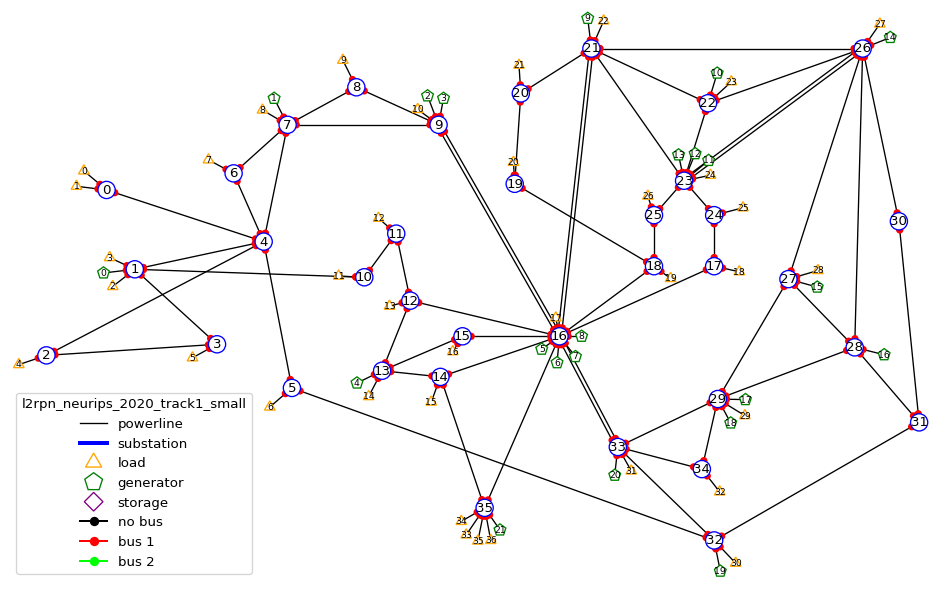

In [6]:
plot_helper = PlotMatplot(env.observation_space, 
                          sub_radius=14, 
                          load_radius=10, 
                          gen_radius=10,
                          width=950,
                          height=600,
                        )
plot_helper._line_bus_radius = 6
plot_helper._line_arrow_width = 10
plot_helper._line_arrow_len = 17


fig = plot_helper.plot_layout()
fig.show()

## Helper func to plot

In [7]:
def plot_action(action):
    obs = env.reset()
    obs, reward, done, info = env.step(env.action_space(action))
    fig_obs = plot_helper.plot_obs(obs, line_info=None, load_info=None, gen_info=None)
    print('Is ambigous??? -> {}'.format(info['is_ambiguous']))
    print('Exception => {}'.format(info['exception']))
    print()
    return fig_obs

Is ambigous??? -> False
Exception => []



<ipython-input-9-1fc218670c53>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_obs.show()


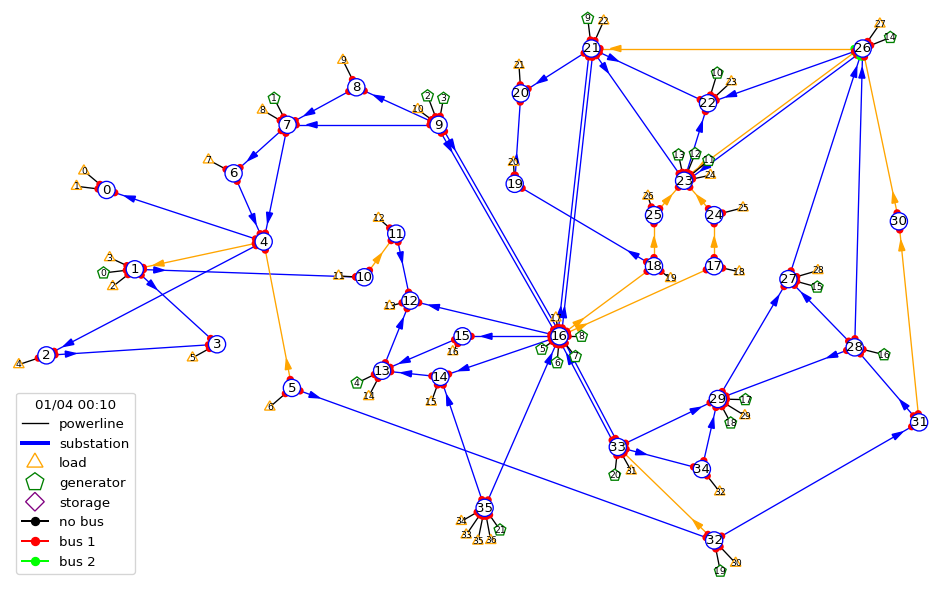

In [9]:
action_sub26={'set_bus':{'substations_id':[(26,(2,2,1,1,2,2,1,1,1))]}}
fig_obs = plot_action(action_sub26)
fig_obs.show()

Is ambigous??? -> False
Exception => []



<ipython-input-56-479aaf35de0b>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_obs.show()


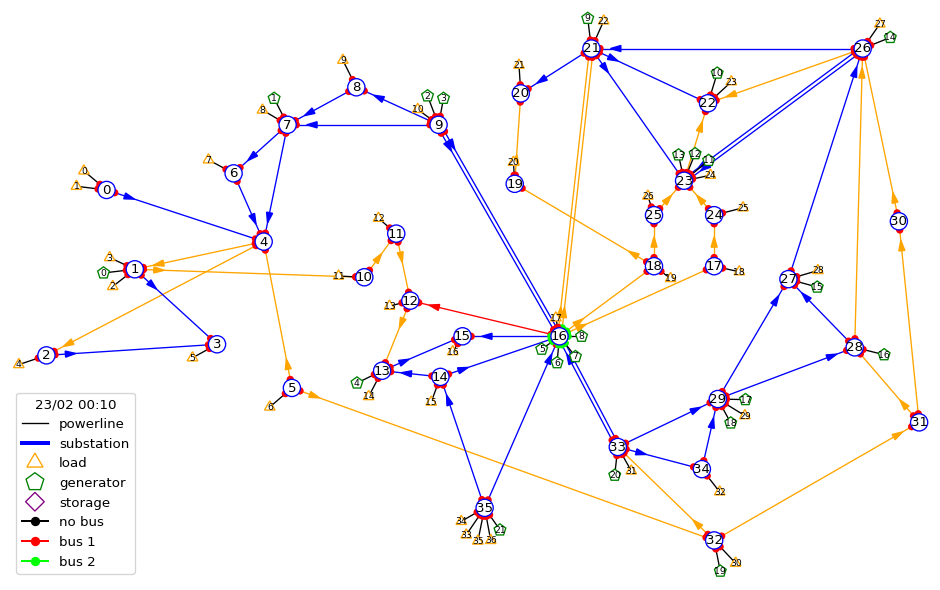

In [56]:
action_sub16={'set_bus':{'substations_id':[(16,(2,1,1,1,2,2,2,1,2,2,2,1,2,2,2,2,1))]}}
fig_obs = plot_action(action_sub16)
fig_obs.show()

Is ambigous??? -> False
Exception => []



<ipython-input-57-a278f34ad6dc>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_obs.show()


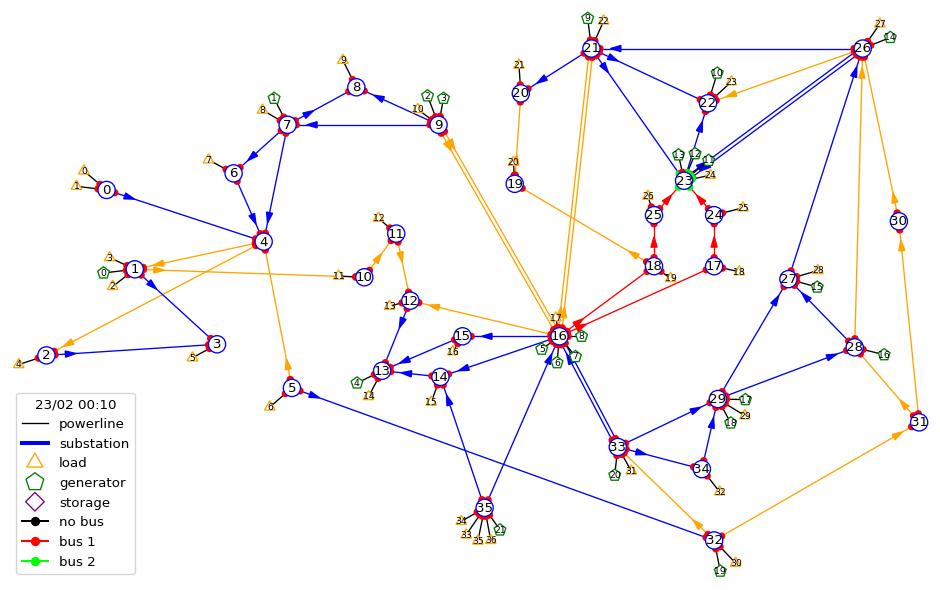

In [57]:
action_sub26={'set_bus':{'substations_id':[(26,(2,2,2,1,2,1,1,1,1))]}}
fig_obs = plot_action(action_sub28)
fig_obs.show()

Is ambigous??? -> False
Exception => []



<ipython-input-58-86ccfac442c4>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_obs.show()


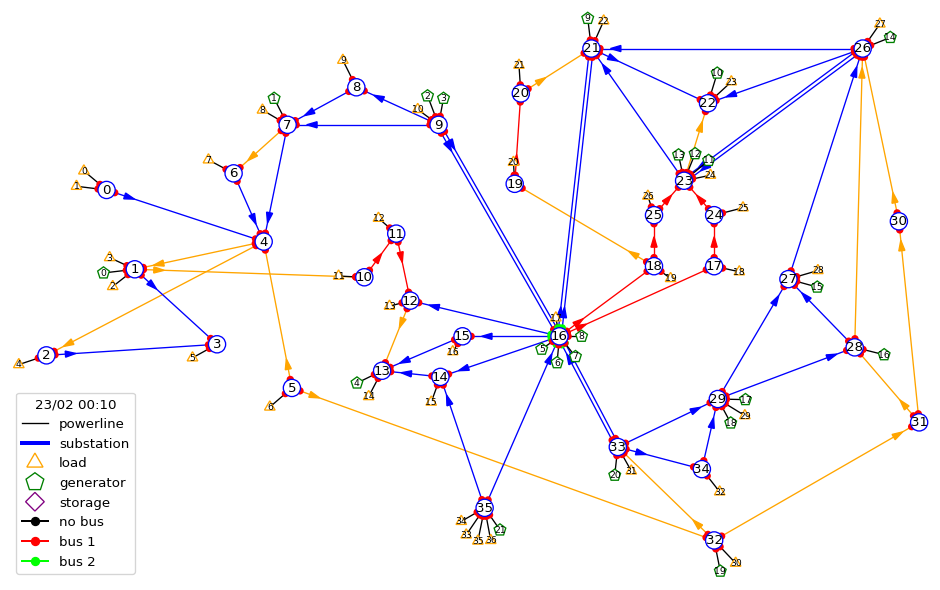

In [58]:
action_sub16={'set_bus':{'substations_id':[(16,(2,1,1,2,2,1,1,2,2,2,2,2,1,1,1,1,2))]}}
fig_obs = plot_action(action_sub16)
fig_obs.show()

Is ambigous??? -> False
Exception => []



<ipython-input-43-dca5af517187>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_obs.show()


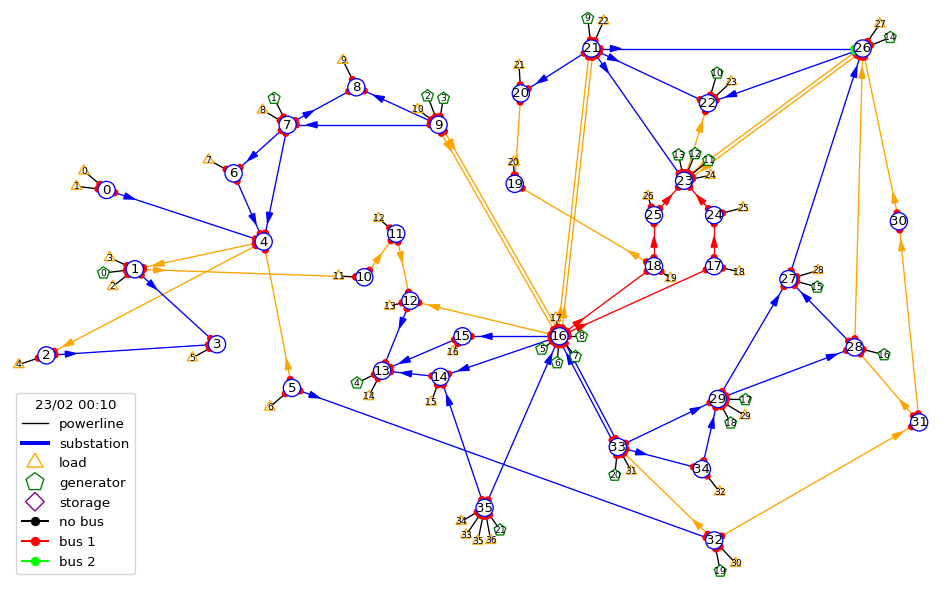

In [43]:
action_sub26={'set_bus':{'substations_id':[(26,(2,1,1,2,1,1,1,1,1))]}}
fig_obs = plot_action(action_sub28)
fig_obs.show()

Is ambigous??? -> False
Exception => []



<ipython-input-44-3b5eda236155>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_obs.show()


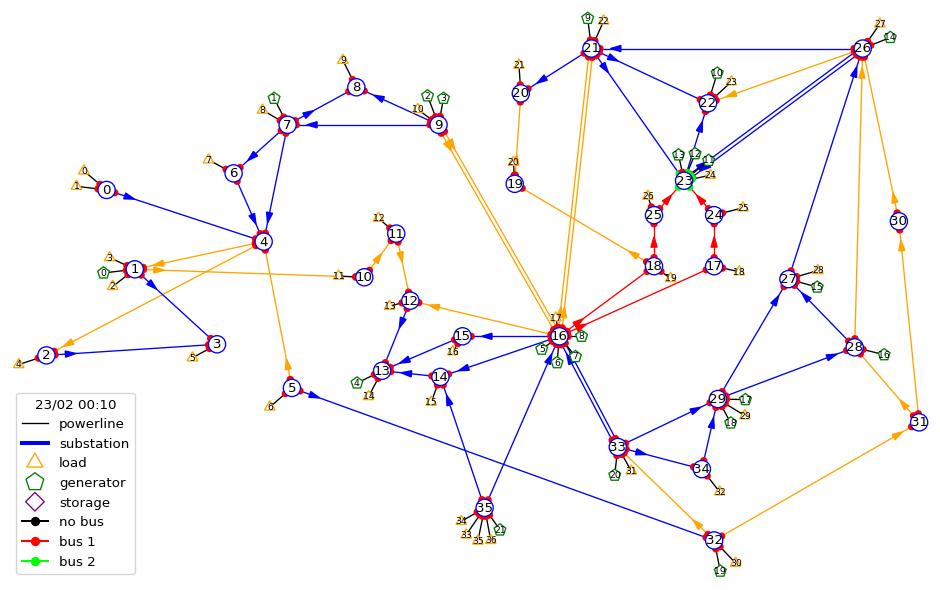

In [44]:
action_sub23={'set_bus':{'substations_id':[(23,(2,2,2,2,1,1,2,2,1,2))]}}
fig_obs = plot_action(action_sub23)
fig_obs.show()

Is ambigous??? -> False
Exception => []



<ipython-input-46-a5135354f434>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_obs.show()


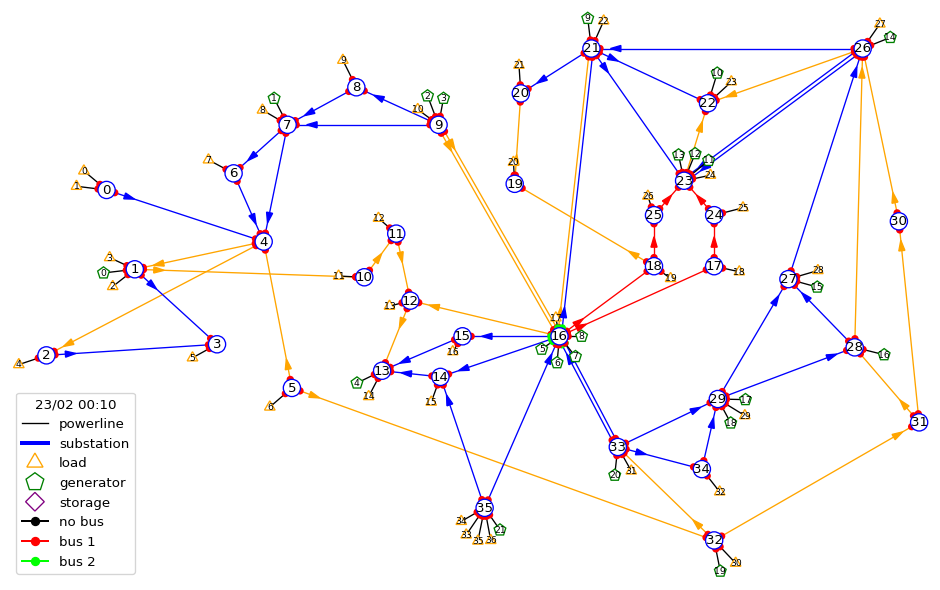

In [46]:
action_sub16={'set_bus':{'substations_id':[(16,(2,1,1,1,2,1,1,1,2,2,2,1,2,1,1,1,2))]}}
fig_obs = plot_action(action_sub16)
fig_obs.show()

Is ambigous??? -> False
Exception => []



<ipython-input-47-cf25e265221d>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_obs.show()


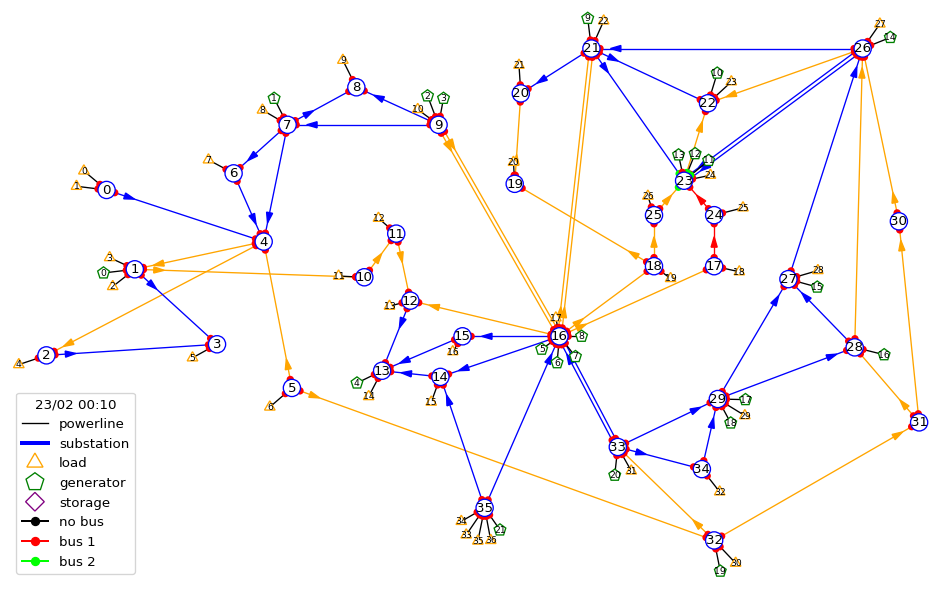

In [47]:
action_sub23={'set_bus':{'substations_id':[(23,(2,2,1,2,1,1,2,2,1,1))]}}
fig_obs = plot_action(action_sub23)
fig_obs.show()

Is ambigous??? -> False
Exception => []



<ipython-input-49-f09d14c54bc6>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_obs.show()


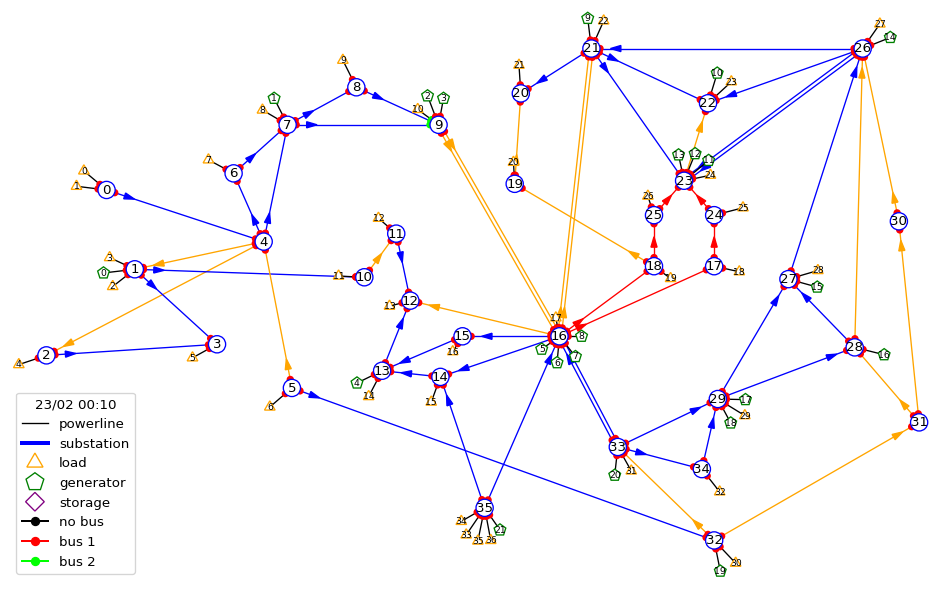

In [49]:
action_sub9={'set_bus':{'substations_id':[(9,(2,2,1,1,1,1,2))]}}
fig_obs = plot_action(action_sub9)
fig_obs.show()

Is ambigous??? -> False
Exception => []



<ipython-input-50-9b3c634c68af>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_obs.show()


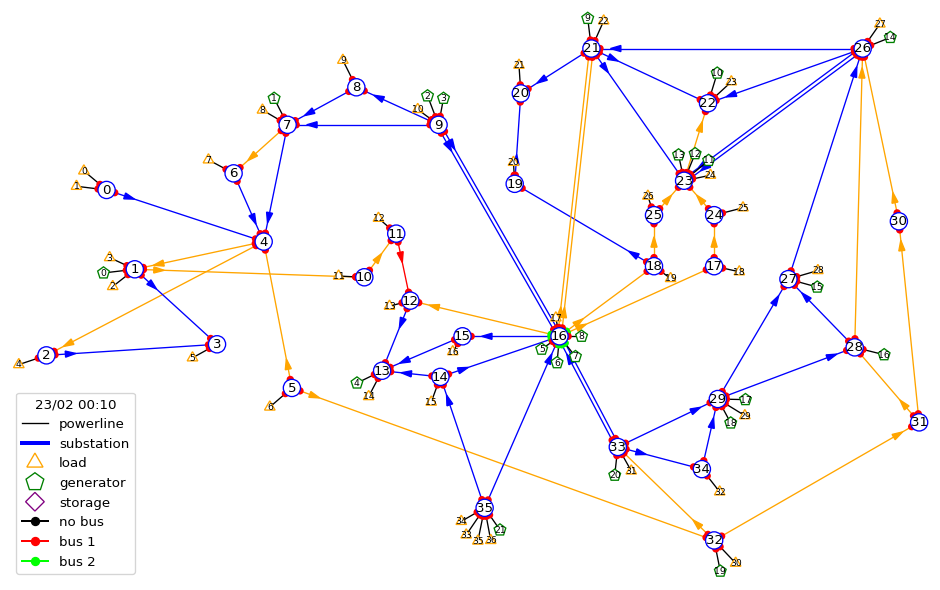

In [50]:
action_sub16={'set_bus':{'substations_id':[(16,(2,1,1,2,2,2,2,1,1,2,2,1,1,2,2,1,1))]}}
fig_obs = plot_action(action_sub16)
fig_obs.show()

Is ambigous??? -> False
Exception => []



<ipython-input-52-0026fa71c4ce>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_obs.show()


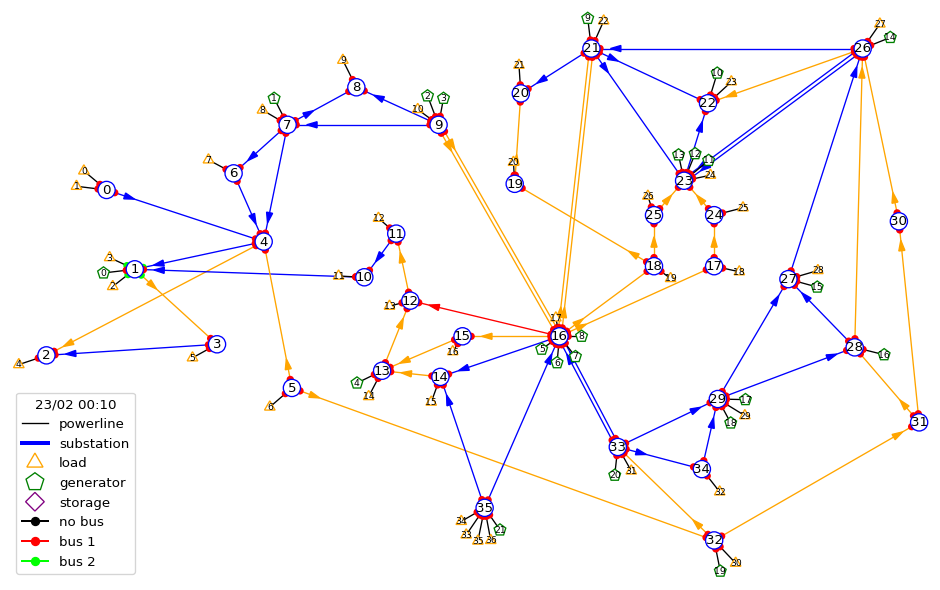

In [52]:
action_sub1={'set_bus':{'substations_id':[(1,(2,2,1,1,2,2))]}}
fig_obs = plot_action(action_sub1)
fig_obs.show()

Is ambigous??? -> False
Exception => []



<ipython-input-53-9b0e96eb2acb>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_obs.show()


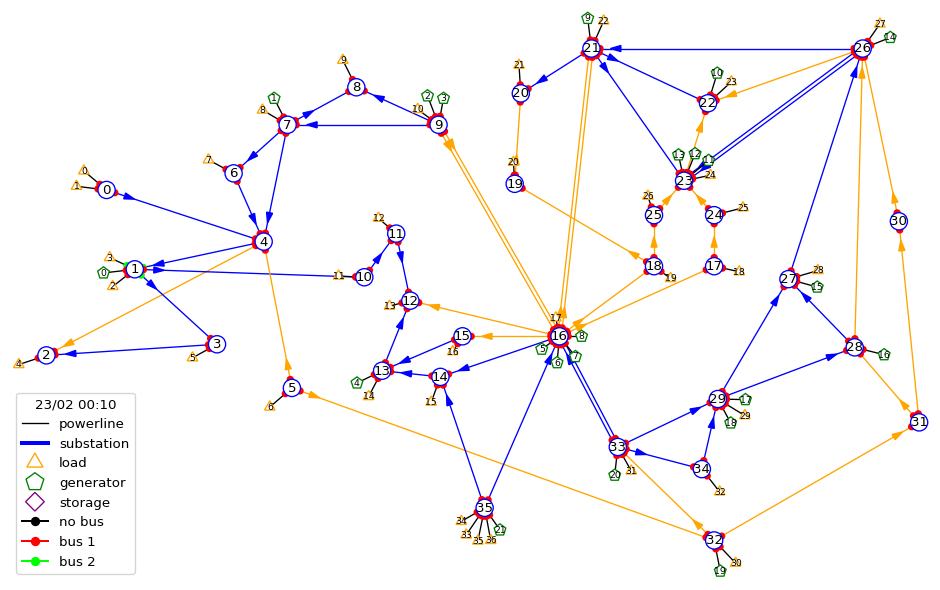

In [53]:
action_sub1={'set_bus':{'substations_id':[(1,(2,2,1,1,1,2))]}}
fig_obs = plot_action(action_sub1)
fig_obs.show()

Is ambigous??? -> False
Exception => []



<ipython-input-54-81f93dfe5ffa>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_obs.show()


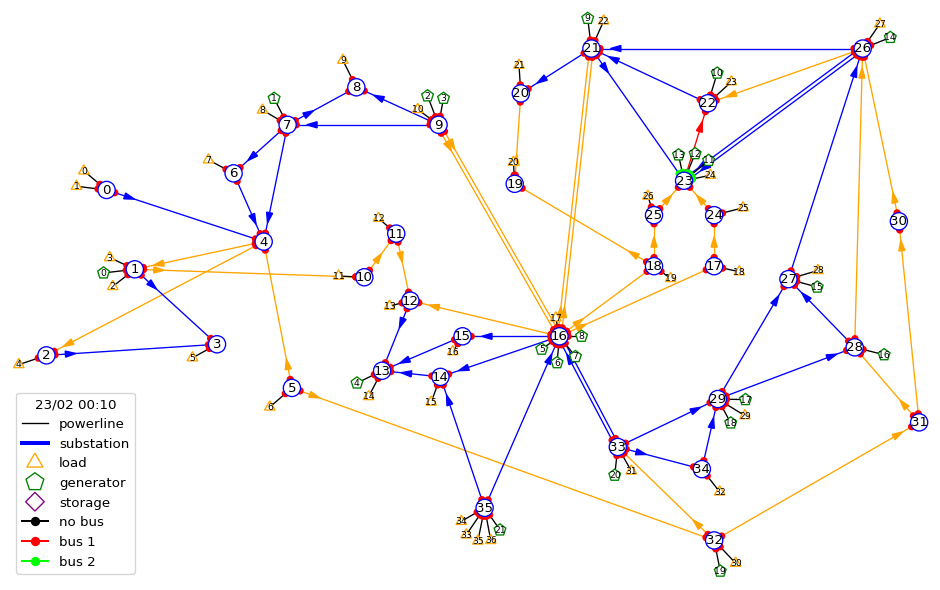

In [54]:
action_sub23={'set_bus':{'substations_id':[(23,(2,1,1,1,2,2,2,2,2,2))]}}
fig_obs = plot_action(action_sub23)
fig_obs.show()

In [ ]:
action_sub16={'set_bus':{'substations_id':[(16,(2,2,2,2,2,1,1,2,2,2,1,1,2,2,1,2,1))]}}
fig_obs = plot_action(action_sub16)
fig_obs.show()

In [ ]:
action_sub16={'set_bus':{'substations_id':[(16,(2,2,2,2,2,1,1,2,2,1,1,2,2,2,1,2,2))]}}
fig_obs = plot_action(action_sub16)
fig_obs.show()

Is ambigous??? -> False
Exception => []



<ipython-input-55-37f1736b345d>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_obs.show()


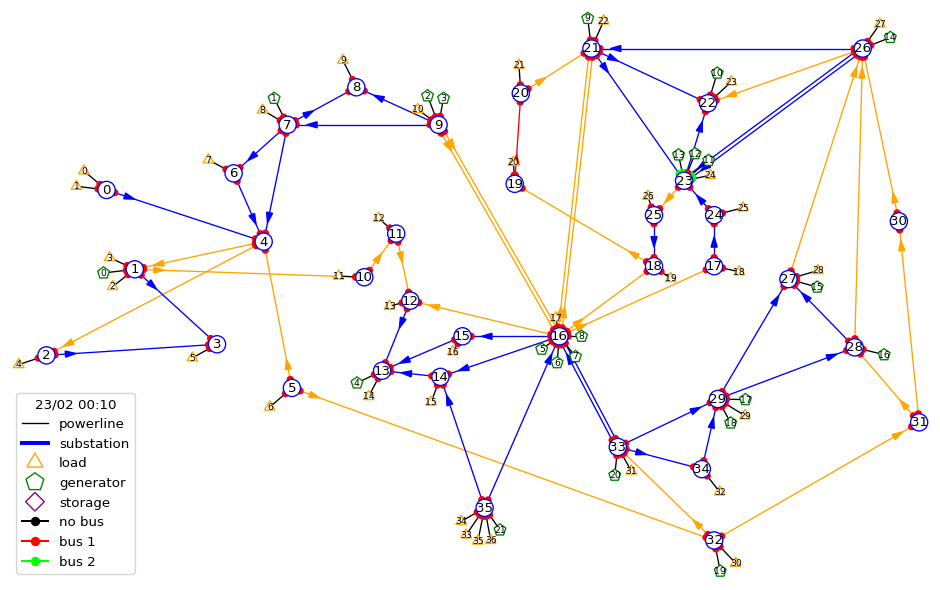

In [55]:
action_sub23={'set_bus':{'substations_id':[(23,(2,2,1,1,2,2,2,1,2,2))]}}
fig_obs = plot_action(action_sub23)
fig_obs.show()

Is ambigous??? -> False
Exception => []



<ipython-input-60-7d8c2d189a0a>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_obs.show()


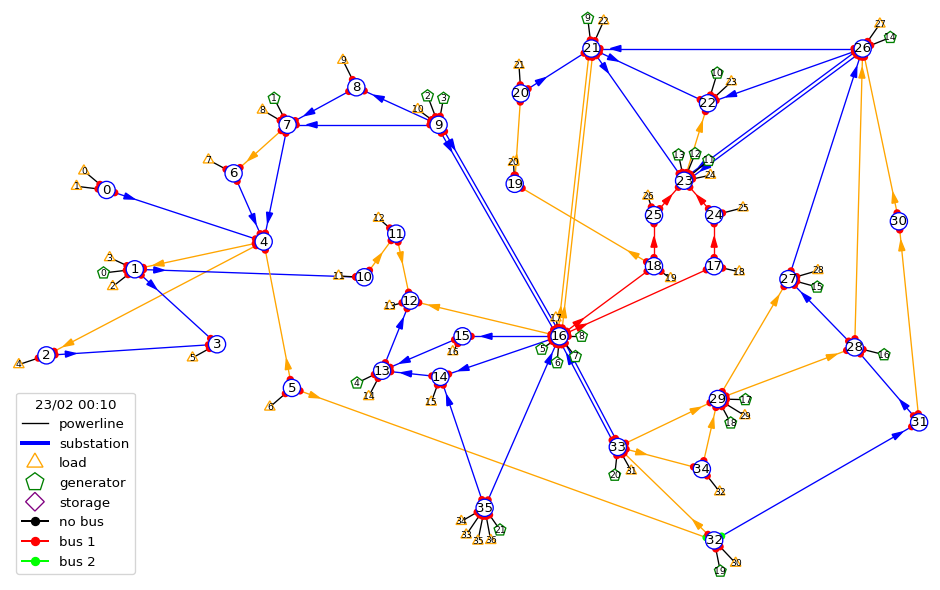

In [60]:
action_sub32={'set_bus':{'substations_id':[(32,(2,2,1,1,1))]}}
fig_obs = plot_action(action_sub32)
fig_obs.show()

Is ambigous??? -> False
Exception => []



<ipython-input-61-c2230f8ea75b>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_obs.show()


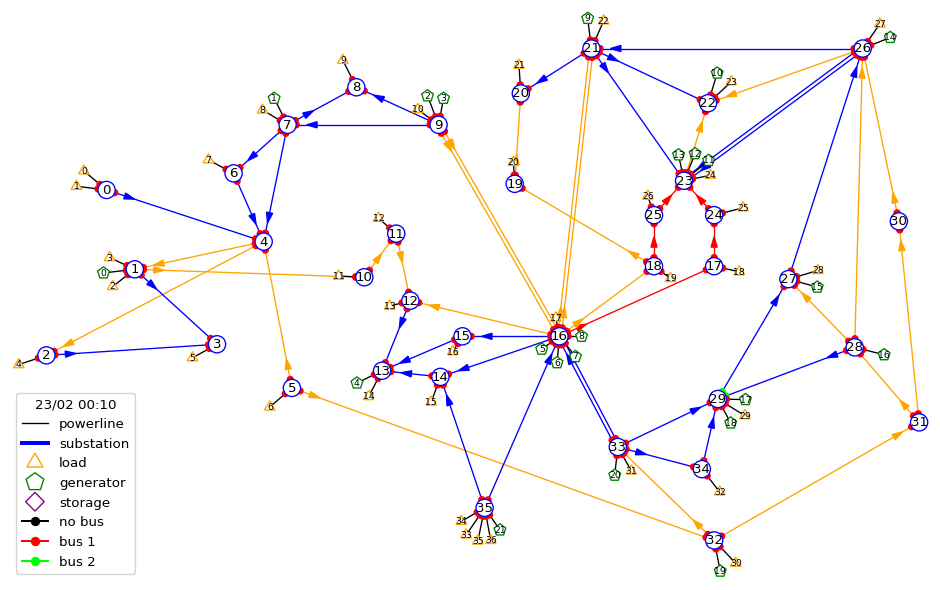

In [61]:
action_sub29={'set_bus':{'substations_id':[(29,(2,2,1,1,1,1,1))]}}
fig_obs = plot_action(action_sub29)
fig_obs.show()

Is ambigous??? -> False
Exception => []



<ipython-input-62-feb9a246da0c>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_obs.show()


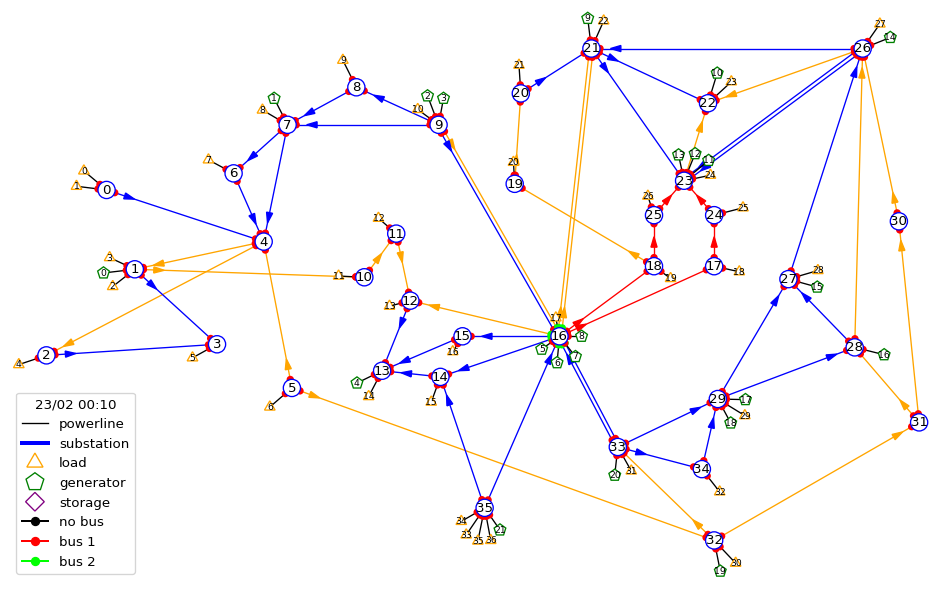

In [62]:
action_sub16={'set_bus':{'substations_id':[(16,(2,2,1,2,2,1,1,2,2,2,2,1,1,2,1,1,2))]}}
fig_obs = plot_action(action_sub16)
fig_obs.show()

Is ambigous??? -> False
Exception => []



<ipython-input-63-f5c50acee02a>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_obs.show()


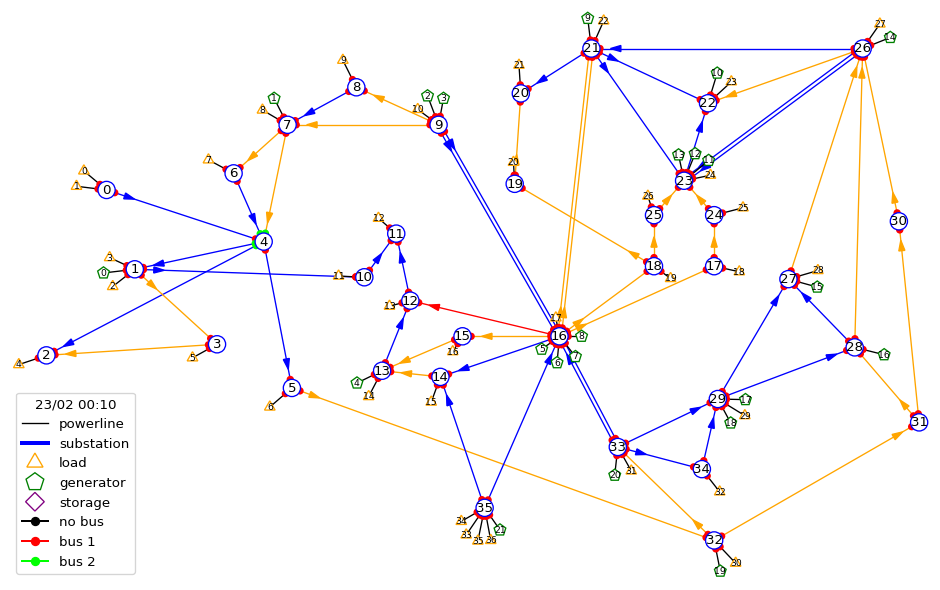

In [63]:
action_sub4={'set_bus':{'substations_id':[(4,(2,1,2,2,2,1))]}}
fig_obs = plot_action(action_sub4)
fig_obs.show()

Is ambigous??? -> False
Exception => []



<ipython-input-64-13cc0a45df9e>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_obs.show()


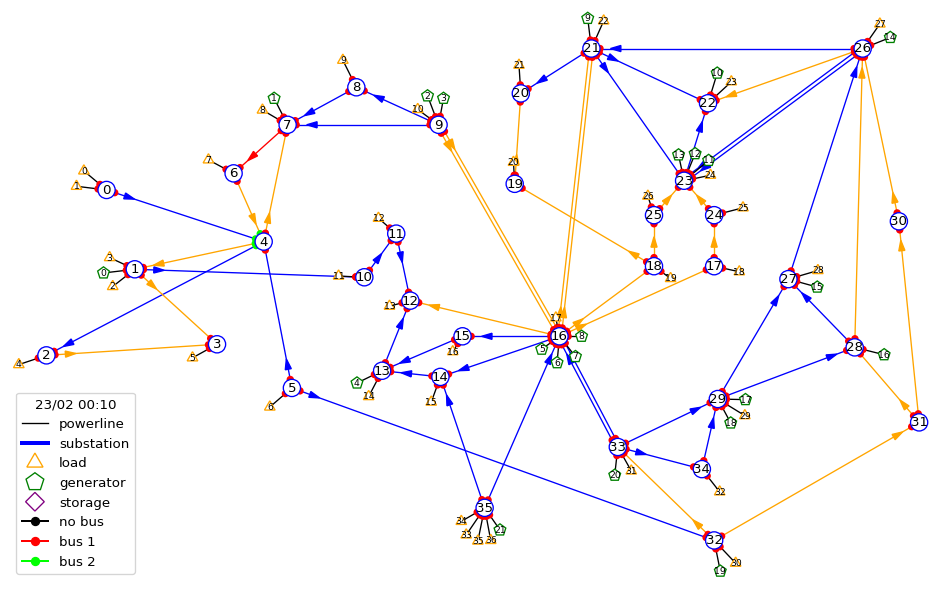

In [64]:
action_sub4={'set_bus':{'substations_id':[(4,(2,2,2,2,1,1))]}}
fig_obs = plot_action(action_sub4)
fig_obs.show()

Is ambigous??? -> False
Exception => []



<ipython-input-77-51214e9be6db>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_obs.show()


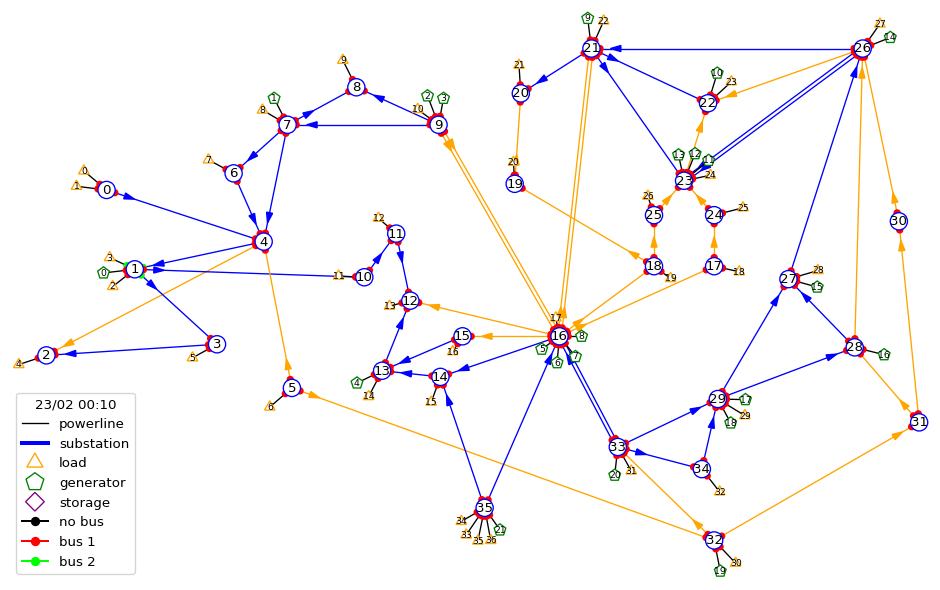

In [77]:
action_sub1={"set_bus": {"loads_id": [(3,2)], "lines_or_id": [(3, 2), (4, 2)]}}
fig_obs = plot_action(action_sub1)
fig_obs.show()


Is ambigous??? -> False
Exception => []



<ipython-input-78-9b0e96eb2acb>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_obs.show()


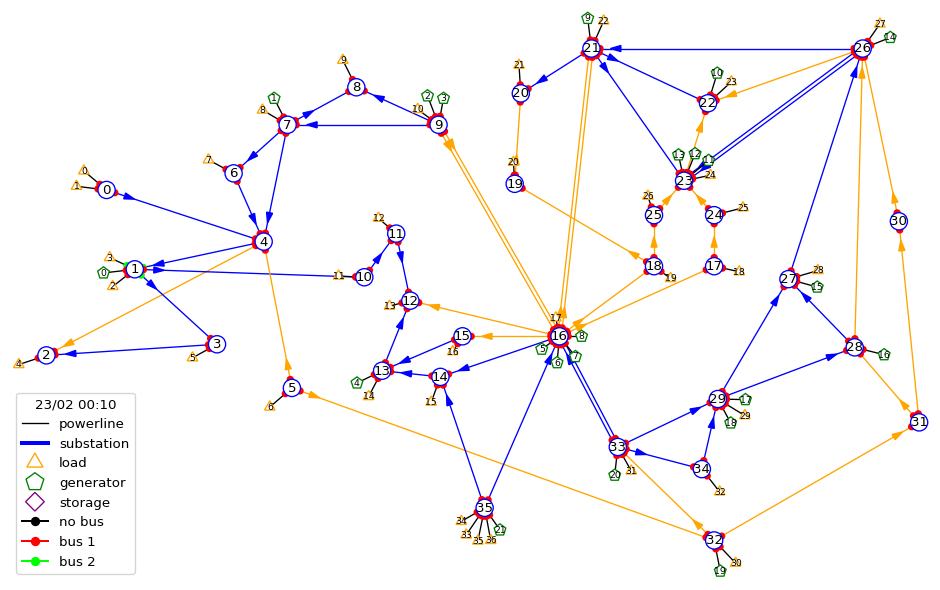

In [78]:
action_sub1={'set_bus':{'substations_id':[(1,(2,2,1,1,1,2))]}}
fig_obs = plot_action(action_sub1)
fig_obs.show()

Is ambigous??? -> False
Exception => []



<ipython-input-105-f790c229a246>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_obs.show()


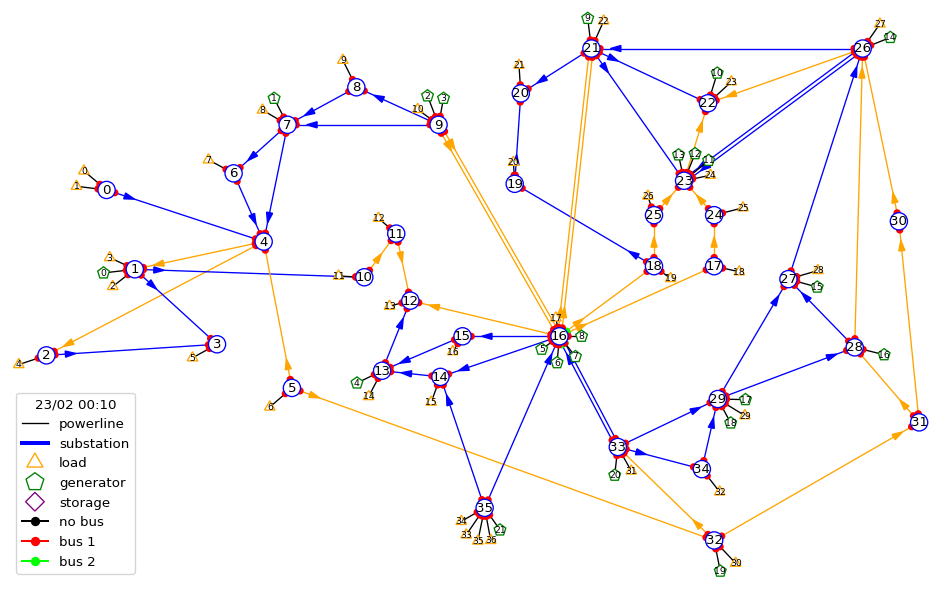

In [105]:
action_sub16_bis={'set_bus':{'substations_id':[(16,(1,1,1,1,1,2,2,1,1,2,2,1,1,1,1,1,1))]}}
fig_obs = plot_action(action_sub16_bis)
fig_obs.show()


In [106]:
act_bis=env.action_space(action_sub16_bis)
act_bis.to_vect()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 2., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Is ambigous??? -> False
Exception => []



<ipython-input-99-7cf69b694373>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_obs.show()


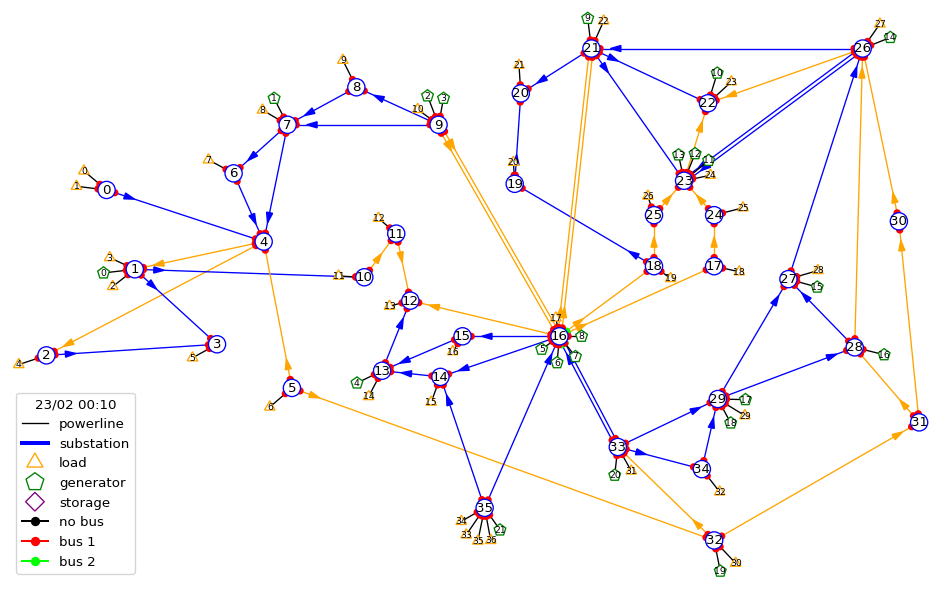

In [99]:
action_sub16={'set_bus': {'lines_or_id': [(48, 2), (49, 2), (22, 2), (23, 2)]}}
fig_obs = plot_action(action_sub16)
fig_obs.show()

In [107]:
act=env.action_space(action_sub16)
act.to_vect()[125:140]

array([0., 0., 0., 0., 2., 2., 0., 0., 2., 2., 0., 0., 0., 0., 0.],
      dtype=float32)

In [108]:
act_bis.to_vect()[125:140]

array([1., 1., 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1.],
      dtype=float32)